<a href="https://colab.research.google.com/github/PaulaLuana/aprendizado-de-maquina/blob/main/Lista7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 07

Implementar algo bastante semelhante ao que foi pedido no Trabalho Prático 01, para:

1. Usar um único GridSearchCV e um único RandomSearchCV para mostrar todos os resultados ranqueados.

2. Busque usar algoritmos diversos (lineares, baseados em árvore, não lineares, etc.).

3. Use os hiperparâmetros padrão de cada algoritmo, além de outros não padrão.

Dica: pode-se tomar por base o seguinte notebook disponível do repositório GitHub da disciplina: [09-GridSearchCV com multiplos algoritmos.ipynb](https://github.com/regispires/aulas-machine-learning-2022/blob/main/09-GridSearchCV%20com%20multiplos%20algoritmos.ipynb)
<br><br>

----------

<br>

**Descricao do Trabalho Prático 01**<br>
Resolução de Problema de Aprendizado Supervisionado
Submissão até 23/05 (segunda). Apresentação em 24/05 (terça).

Resolva um problema de Classificação ou de Regressão em um Jupyter Notebook e envie sua resolução (arquivo .ipynb + conjunto de dados).

* O conjunto de dados deve ter no mínimo 6 características (features) e 1000 amostras.

A seleção do conjunto de dados a ser usado deve ser preenchida na seguinte planilha, sendo que deve-se observar o não uso de um conjunto de dados já usado por outro aluno.

* [Seleção de Conjuntos de Dados para Trabalho Prático 1 de Aprendizado de Máquina - 2022.1](https://docs.google.com/spreadsheets/d/1TXq8V44Kb6OD2ZkwhLhfTw-PyEbFm_hFQMcqTFb7RrY/edit?usp=sharing)

A resolução deve conter:

* Importação dos dados
* Análise dos dados
* Pré-processamento
* Uso de modelos preditivos para obtenção de predições (classificação ou regressão)
  * Usar validação cruzada com k-Fold sobre o conjunto de treino.
  * Usar pelo menos 3 diferentes algoritmos de aprendizado de máquina.
  * Usar diferentes hiper-parâmetros para cada algoritmo escolhido.
  * Comparar resultados com e sem escalonamento de características (features).
  * Usar Pipeline

* Avaliação dos resultados através de métricas (RMSE para regressão e F1-Score para classificação) sobre o conjunto de treino e de teste.
* Apresentação dos resultados através de tabela e gráfico de barras.
* Apresentação do trabalho (obrigatório).

## Importações

In [ ]:
#bibliotecas padroes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#algoritmos multiclasse
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#escalonamento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#algoritmos auxiliares
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#metricas
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine-learning/datasets/fetal_health.csv')

## Apresentação do problema: Fetal Health Classification
### Objetivo
Classificar a saúde fetal para prevenir a mortalidade infantil e materna.

### Contexto 
A redução da mortalidade infantil está refletida em vários Objetivos de Desenvolvimento Sustentável das Nações Unidas e é um indicador chave do progresso humano.
A ONU espera que, até 2030, os países acabem com as mortes evitáveis ​​de recém-nascidos e crianças menores de 5 anos, com todos os países visando reduzir a mortalidade de menores de 5 anos para pelo menos 25 por 1.000 nascidos vivos.

Paralelamente à noção de mortalidade infantil está, obviamente, a mortalidade materna, que é responsável por 295.000 mortes durante e após a gravidez e o parto (a partir de 2017). A grande maioria dessas mortes (94%) ocorreu em ambientes de poucos recursos e a maioria poderia ter sido evitada .

Diante do exposto, os Cardiotocogramas (CTGs) são uma opção simples e de baixo custo para avaliar a saúde fetal, permitindo que os profissionais de saúde atuem na prevenção da mortalidade infantil e materna. O próprio equipamento funciona enviando pulsos de ultrassom e lendo sua resposta, lançando luz sobre a frequência cardíaca fetal (FCF), movimentos fetais, contrações uterinas e muito mais.

### Dados 

Este conjunto de dados contém 2126 registros de características extraídas de exames de Cardiotocograma, que foram então classificados por três obstetras especialistas em 3 classes:
* Normal
* Suspeito
* Patológico


## Análise dos dados

In [ ]:
df.shape

(2126, 22)

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

**Descrição da colunas**

'baseline value' - linha de base da FCF (batimentos por minuto)<br>
'accelerations' - Número de acelerações por segundo<br>
'fetal_movement' - Número de movimentos fetais por segundo<br>
'uterine_contractions' - Número de contrações uterinas por segundo<br> 
'light_decelerations' - Número de desacelerações de luz por segundo<br>
'severe_decelerations' - Número de desacelerações severas por segundo<br>
'prolongued_decelerations' - Número de desacelerações prolongadas por segundo<br>
'abnormal_short_term_variability' - Porcentagem de tempo com variabilidade anormal de curto prazo<br>
'mean_value_of_short_term_variability' - Valor médio da variabilidade de curto prazo<br> 
'percentage_of_time_with_abnormal_long_term_variability' - Porcentagem de tempo com variabilidade anormal de longo prazo<br>
'mean_value_of_long_term_variability' - Valor médio da variabilidade de longo prazo<br>
'histogram_width' - Largura do histograma FHR<br>
'histogram_min' - Mínimo (baixa frequência) do histograma da FCF<br>
'histogram_max' - Máximo (alta frequência) do histograma da FCF<br>
'histogram_number_of_peaks' - Número de picos do histograma<br>
'histogram_number_of_zeroes' - Número de zeros do histograma<br>
'histogram_mode' - modo de histograma<br>
'histogram_mean' - média do histograma<br>
'histogram_median' - mediana do histograma<br>
'histogram_variance' - Variação do histograma<br>
'histogram_tendency' - tendência do histograma<br>
'fetal_health' - marcado como 1 (normal), 2 (suspeito) e 3 (patológico)<br>

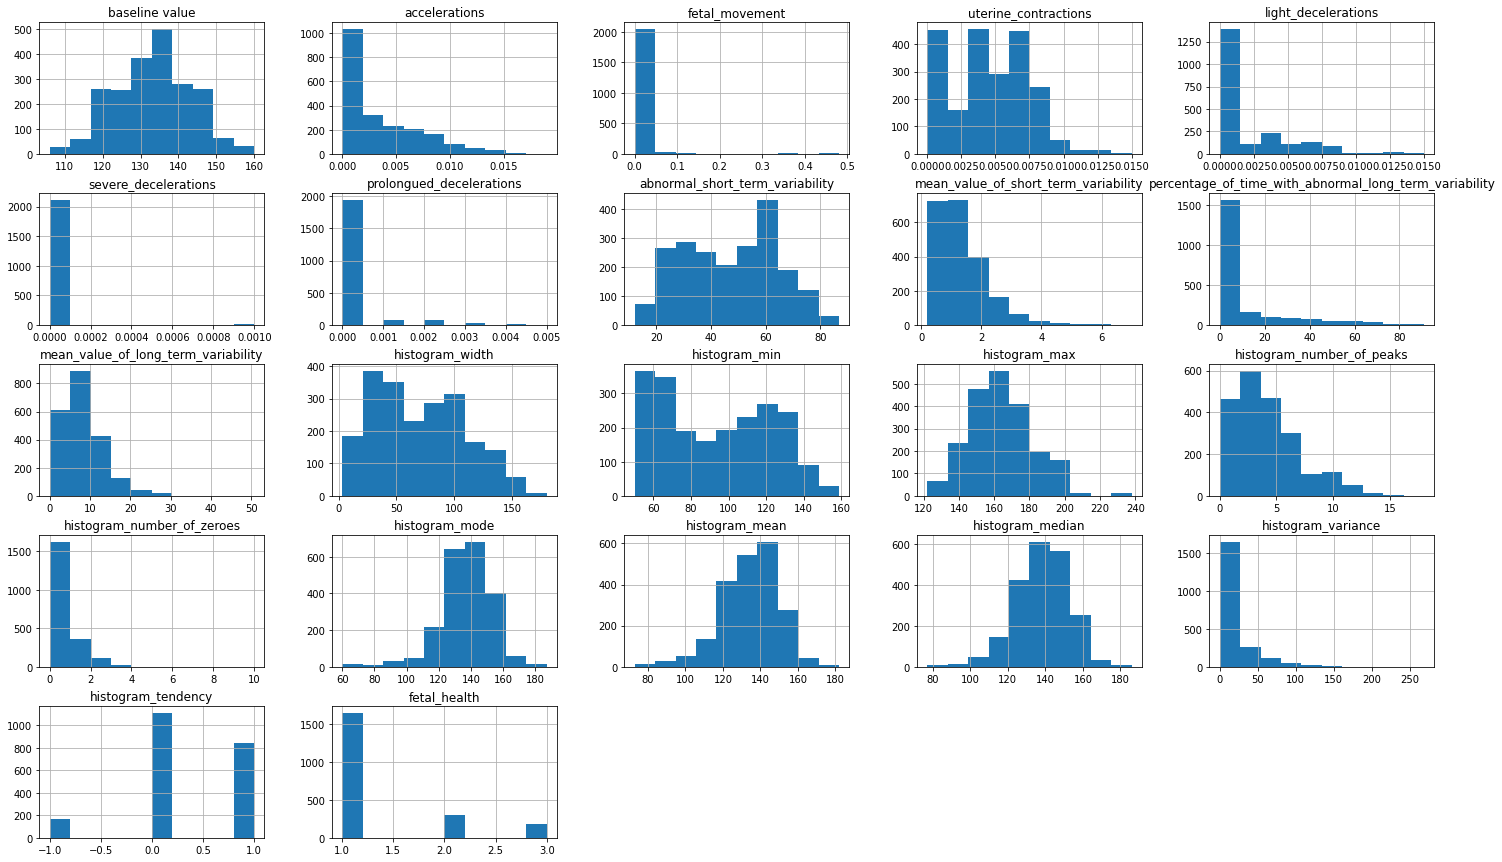

In [ ]:
df.hist(figsize=(25,15));

In [ ]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
max = df.max()
max

baseline value                                            160.000
accelerations                                               0.019
fetal_movement                                              0.481
uterine_contractions                                        0.015
light_decelerations                                         0.015
severe_decelerations                                        0.001
prolongued_decelerations                                    0.005
abnormal_short_term_variability                            87.000
mean_value_of_short_term_variability                        7.000
percentage_of_time_with_abnormal_long_term_variability     91.000
mean_value_of_long_term_variability                        50.700
histogram_width                                           180.000
histogram_min                                             159.000
histogram_max                                             238.000
histogram_number_of_peaks                                  18.000
histogram_

In [ ]:
min = df.min()
min

baseline value                                            106.0
accelerations                                               0.0
fetal_movement                                              0.0
uterine_contractions                                        0.0
light_decelerations                                         0.0
severe_decelerations                                        0.0
prolongued_decelerations                                    0.0
abnormal_short_term_variability                            12.0
mean_value_of_short_term_variability                        0.2
percentage_of_time_with_abnormal_long_term_variability      0.0
mean_value_of_long_term_variability                         0.0
histogram_width                                             3.0
histogram_min                                              50.0
histogram_max                                             122.0
histogram_number_of_peaks                                   0.0
histogram_number_of_zeroes              

In [ ]:
type(max)

pandas.core.series.Series

**Quantos valores maximos acontecem no df**

In [ ]:
for i in max.index:
  filter = df[i] == max[i]
  result = df[filter]
  print(i, ': ', len(result))

baseline value :  1
accelerations :  1
fetal_movement :  1
uterine_contractions :  1
light_decelerations :  3
severe_decelerations :  7
prolongued_decelerations :  3
abnormal_short_term_variability :  1
mean_value_of_short_term_variability :  1
percentage_of_time_with_abnormal_long_term_variability :  4
mean_value_of_long_term_variability :  1
histogram_width :  1
histogram_min :  1
histogram_max :  6
histogram_number_of_peaks :  1
histogram_number_of_zeroes :  1
histogram_mode :  1
histogram_mean :  1
histogram_median :  1
histogram_variance :  1
histogram_tendency :  846
fetal_health :  176


**Quantos valores minimos acontecem no df**

In [ ]:
for i in min.index:
  filter = df[i] == min[i]
  result = df[filter]
  print(i, ': ', len(result))

baseline value :  7
accelerations :  894
fetal_movement :  1311
uterine_contractions :  332
light_decelerations :  1231
severe_decelerations :  2119
prolongued_decelerations :  1948
abnormal_short_term_variability :  2
mean_value_of_short_term_variability :  47
percentage_of_time_with_abnormal_long_term_variability :  1240
mean_value_of_long_term_variability :  137
histogram_width :  2
histogram_min :  77
histogram_max :  2
histogram_number_of_peaks :  107
histogram_number_of_zeroes :  1624
histogram_mode :  6
histogram_mean :  1
histogram_median :  1
histogram_variance :  187
histogram_tendency :  165
fetal_health :  1655


In [ ]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
matriz_corr = df.corr(method='pearson')

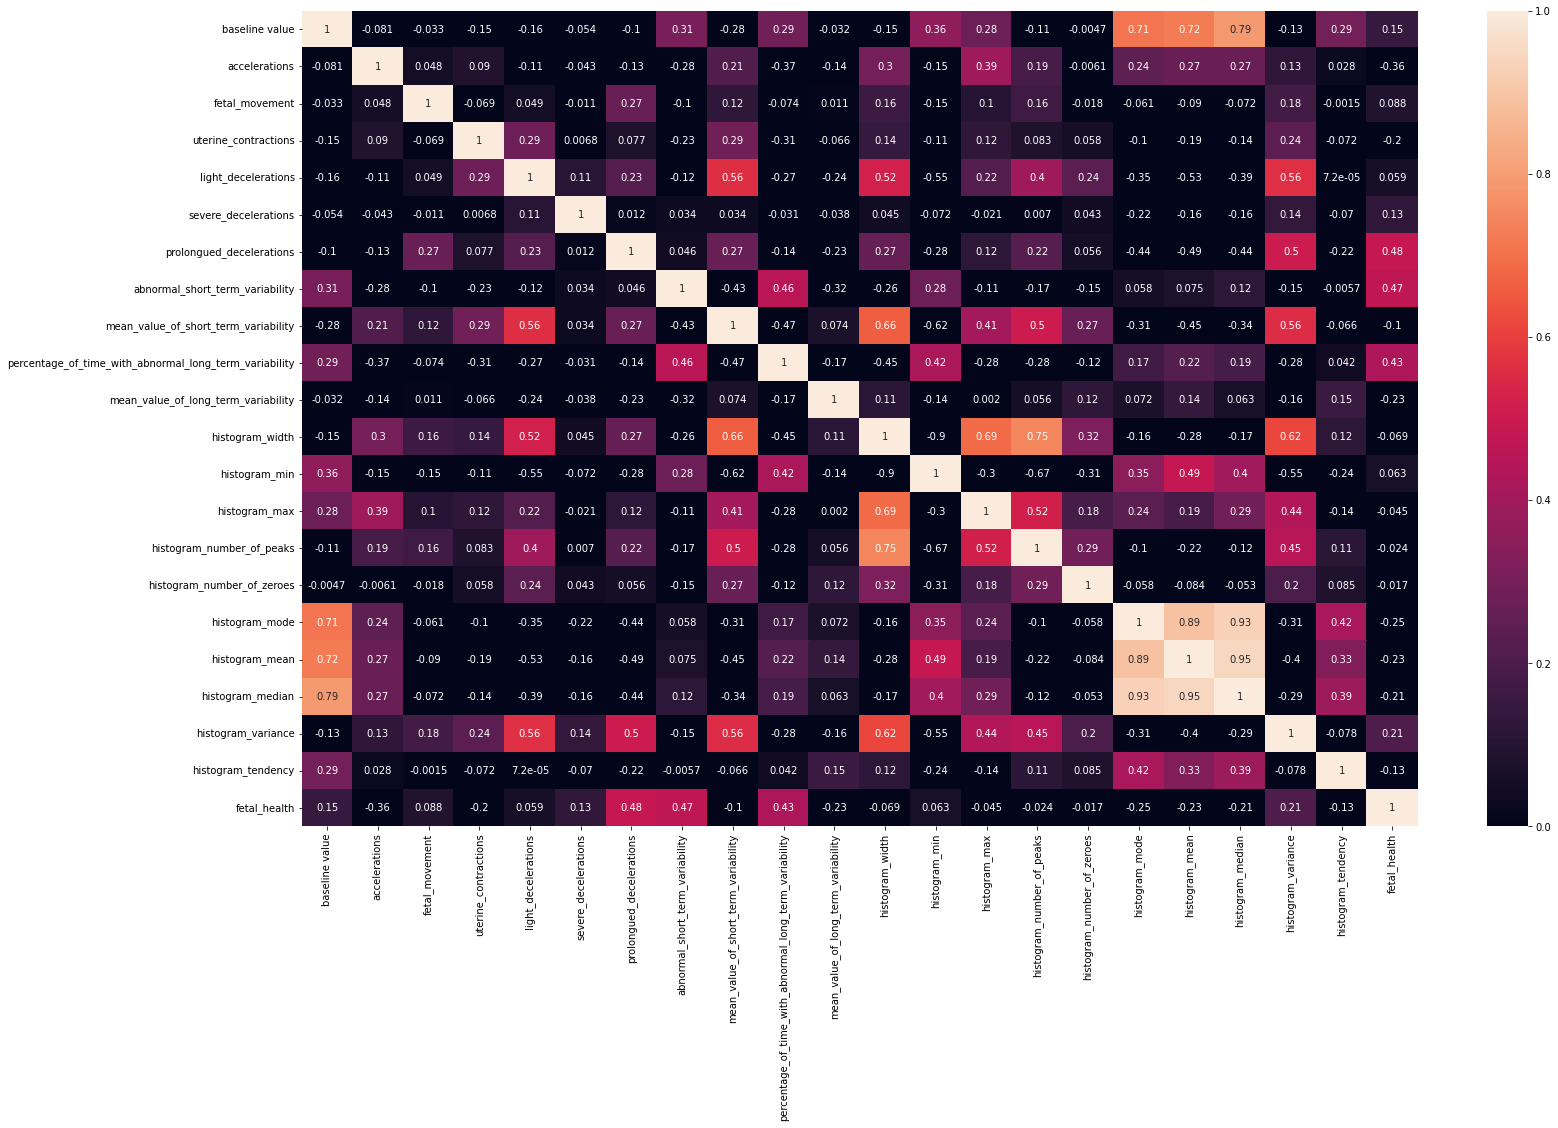

In [ ]:
plt.figure(figsize=(25, 15))
sns.heatmap(matriz_corr, annot=True, vmin=0, vmax=1);

In [ ]:
type(matriz_corr['fetal_health'])

pandas.core.series.Series

In [ ]:
matriz_corr['fetal_health'].index

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

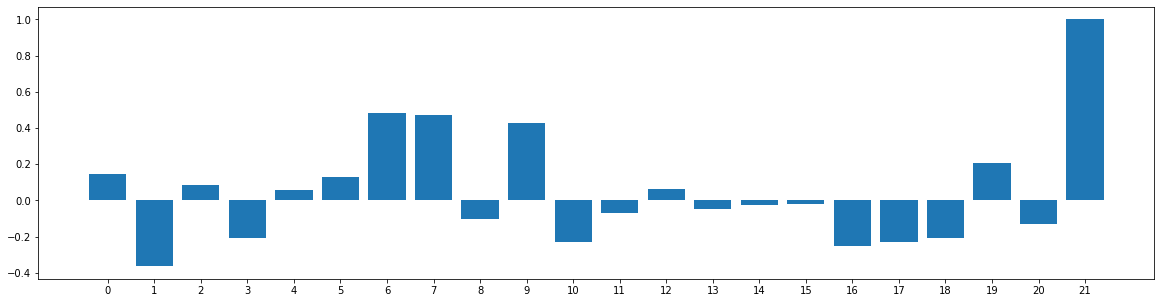

In [ ]:
x = np.arange(len(matriz_corr['fetal_health']))
plt.subplots(figsize=(20,5))
plt.bar(x, matriz_corr['fetal_health'], tick_label = x);

In [ ]:
matriz_corr['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

## Pré-processamento

Selecao de features

In [ ]:
filter = abs(matriz_corr['fetal_health']).sort_values(ascending=False)
filter

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                             0.364066
histogram_mode                                            0.250412
histogram_mean                                            0.226985
mean_value_of_long_term_variability                       0.226797
histogram_variance                                        0.206630
histogram_median                                          0.205033
uterine_contractions                                      0.204894
baseline value                                            0.148151
histogram_tendency                                        0.131976
severe_decelerations                                      0.131934
mean_value_of_short_term_variability                      0.10

Selecionar apenas as colunas que possuem acima de 14% de correlacao

In [ ]:
(filter.values > 0.14).sum()

12

In [ ]:
columns = filter.index[:12]
columns

Index(['fetal_health', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'accelerations', 'histogram_mode', 'histogram_mean',
       'mean_value_of_long_term_variability', 'histogram_variance',
       'histogram_median', 'uterine_contractions', 'baseline value'],
      dtype='object')

In [ ]:
df = df[columns]

In [ ]:
df

,fetal_health,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,accelerations,histogram_mode,histogram_mean,mean_value_of_long_term_variability,histogram_variance,histogram_median,uterine_contractions,baseline value
0,2.0,0.0,73.0,43.0,0.000,120.0,137.0,2.4,73.0,121.0,0.000,120.0
1,1.0,0.0,17.0,0.0,0.006,141.0,136.0,10.4,12.0,140.0,0.006,132.0
2,1.0,0.0,16.0,0.0,0.003,141.0,135.0,13.4,13.0,138.0,0.008,133.0
3,1.0,0.0,16.0,0.0,0.003,137.0,134.0,23.0,13.0,137.0,0.008,134.0
4,1.0,0.0,16.0,0.0,0.007,137.0,136.0,19.9,11.0,138.0,0.008,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2.0,0.0,79.0,25.0,0.000,153.0,150.0,7.2,2.0,152.0,0.007,140.0
2122,2.0,0.0,78.0,22.0,0.001,152.0,148.0,7.1,3.0,151.0,0.007,140.0
2123,2.0,0.0,79.0,20.0,0.001,153.0,148.0,6.1,4.0,152.0,0.007,140.0
2124,2.0,0.0,78.0,27.0,0.001,152.0,147.0,7.0,4.0,151.0,0.006,140.0


In [ ]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
df.dtypes

fetal_health                                              float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
percentage_of_time_with_abnormal_long_term_variability    float64
accelerations                                             float64
histogram_mode                                            float64
histogram_mean                                            float64
mean_value_of_long_term_variability                       float64
histogram_variance                                        float64
histogram_median                                          float64
uterine_contractions                                      float64
baseline value                                            float64
dtype: object

In [ ]:
df.loc[df['fetal_health'] == 1.0, 'fetal_health'] = 0
df.loc[df['fetal_health'] == 2.0, 'fetal_health'] = 1
df.loc[df['fetal_health'] == 3.0, 'fetal_health'] = 2

In [ ]:
df['fetal_health'].value_counts()

0.0    1655
1.0     295
2.0     176
Name: fetal_health, dtype: int64

## Modelos preditivos

In [ ]:
clf1 = SVC(probability=True, random_state=42)
clf2 = LogisticRegression(random_state=42, max_iter=200, solver='liblinear')
clf3 = GradientBoostingClassifier(random_state=42)

In [ ]:
classifiers = [clf1, clf2, clf3]

In [ ]:
f1_ = list()

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

#### Hiperparâmetros

In [ ]:
param1 = {}
param1['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__penalty'] = ['l1', 'l2']
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__n_estimators'] = [10, 50, 100, 250]
param3['classifier__max_depth'] = [3, 5, 10, 20]
param3['classifier'] = [clf3]

## Grid Search

### Sem escalonamento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, stratify=y, random_state=42)

In [ ]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3]

In [ ]:
gs1 = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1_micro', return_train_score=True).fit(X_train, y_train)

In [ ]:
gs1.best_params_

{'classifier': GradientBoostingClassifier(max_depth=5, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100}

In [ ]:
gs1.best_score_

0.9489247311827956

In [ ]:
y_pred_gs1 = gs1.predict(X_test)
print(classification_report(y_test, y_pred_gs1, digits=4))

              precision    recall  f1-score   support

         0.0     0.9508    0.9718    0.9612       497
         1.0     0.8400    0.7159    0.7730        88
         2.0     0.8727    0.9057    0.8889        53

    accuracy                         0.9310       638
   macro avg     0.8878    0.8645    0.8744       638
weighted avg     0.9290    0.9310    0.9292       638



In [ ]:
print("Test Accurary:", accuracy_score(y_test, y_pred_gs1))
print("Test F1-Score:", f1_score(y_test, y_pred_gs1, average='micro'))

Test Accurary: 0.9310344827586207
Test F1-Score: 0.9310344827586207


In [ ]:
df_results_gs1 = pd.DataFrame(gs1.cv_results_)
df_results_gs1.shape

(76, 22)

In [ ]:
df_results_gs1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__max_depth,param_classifier__n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.414181,0.036284,0.047349,0.018870,"SVC(probability=True, random_state=42)",0.01,None,NaN,NaN,NaN,...,0.778226,0.778226,0.778226,0.000000,69,0.778226,0.778226,0.778226,0.778226,0.000000
1,1.004162,0.040345,0.120438,0.037410,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 5}",NaN,NaN,NaN,...,0.778226,0.778226,0.778226,0.000000,69,0.778226,0.778226,0.778226,0.778226,0.000000
2,1.228281,0.052631,0.120968,0.019677,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 10}",NaN,NaN,NaN,...,0.139113,0.139113,0.139113,0.000000,75,0.139113,0.139113,0.139113,0.139113,0.000000
3,1.025383,0.203767,0.170268,0.028038,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.139113,0.139113,0.139113,0.000000,75,0.139113,0.139113,0.139113,0.139113,0.000000
4,0.502256,0.044185,0.059630,0.028375,"SVC(probability=True, random_state=42)",0.1,None,NaN,NaN,NaN,...,0.780242,0.784274,0.781586,0.001901,67,0.782258,0.783266,0.781250,0.782258,0.000823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6.405199,0.782331,0.025561,0.010121,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,10,250,...,0.939516,0.949597,0.943548,0.004355,7,1.000000,1.000000,0.998992,0.999664,0.000475
72,0.330104,0.014938,0.006160,0.000294,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,20,10,...,0.947581,0.937500,0.936156,0.009923,14,1.000000,1.000000,0.998992,0.999664,0.000475
73,1.639571,0.053127,0.009716,0.000277,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,20,50,...,0.947581,0.941532,0.936828,0.011205,13,1.000000,1.000000,0.998992,0.999664,0.000475
74,3.264702,0.078640,0.013820,0.000330,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,20,100,...,0.943548,0.951613,0.938172,0.013707,11,1.000000,1.000000,0.998992,0.999664,0.000475


In [ ]:
df_results_gs1 = df_results_gs1.sort_values(by='rank_test_score')
df_results_gs1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__max_depth,param_classifier__n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
66,1.779564,0.011341,0.010351,0.000115,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,5,100,...,0.949597,0.945565,0.948925,0.002515,1,1.000000,1.000000,0.998992,0.999664,0.000475
65,0.890201,0.015700,0.007735,0.000222,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,5,50,...,0.951613,0.941532,0.948253,0.004752,2,1.000000,1.000000,0.998992,0.999664,0.000475
67,4.460495,0.047347,0.018235,0.000389,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,5,250,...,0.949597,0.949597,0.948253,0.001901,2,1.000000,1.000000,0.998992,0.999664,0.000475
62,1.124130,0.011345,0.008766,0.000092,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,3,100,...,0.941532,0.943548,0.946237,0.005292,4,0.995968,0.996976,0.998992,0.997312,0.001257
63,2.763748,0.007655,0.014597,0.001663,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,3,250,...,0.949597,0.941532,0.945565,0.003292,5,1.000000,1.000000,0.998992,0.999664,0.000475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,1.009674,0.075646,0.132878,0.009463,"SVC(probability=True, random_state=42)",0.1,"{0: 1, 1: 10}",NaN,NaN,NaN,...,0.675403,0.659274,0.665323,0.007175,72,0.658266,0.686492,0.656250,0.667003,0.013806
11,0.677066,0.124797,0.103342,0.027809,"SVC(probability=True, random_state=42)",1,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.679435,0.671371,0.661290,0.020228,73,0.638105,0.699597,0.649194,0.662298,0.026760
7,1.152063,0.204621,0.104044,0.018960,"SVC(probability=True, random_state=42)",0.1,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.500000,0.508065,0.473118,0.043843,74,0.405242,0.503024,0.508065,0.472110,0.047328
3,1.025383,0.203767,0.170268,0.028038,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.139113,0.139113,0.139113,0.000000,75,0.139113,0.139113,0.139113,0.139113,0.000000


In [ ]:
df_results_gs1.reset_index(drop=True, inplace=True)
df_results_gs1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__max_depth,param_classifier__n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.779564,0.011341,0.010351,0.000115,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,5,100,...,0.949597,0.945565,0.948925,0.002515,1,1.000000,1.000000,0.998992,0.999664,0.000475
1,0.890201,0.015700,0.007735,0.000222,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,5,50,...,0.951613,0.941532,0.948253,0.004752,2,1.000000,1.000000,0.998992,0.999664,0.000475
2,4.460495,0.047347,0.018235,0.000389,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,5,250,...,0.949597,0.949597,0.948253,0.001901,2,1.000000,1.000000,0.998992,0.999664,0.000475
3,1.124130,0.011345,0.008766,0.000092,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,3,100,...,0.941532,0.943548,0.946237,0.005292,4,0.995968,0.996976,0.998992,0.997312,0.001257
4,2.763748,0.007655,0.014597,0.001663,"GradientBoostingClassifier(max_depth=5, random...",NaN,NaN,NaN,3,250,...,0.949597,0.941532,0.945565,0.003292,5,1.000000,1.000000,0.998992,0.999664,0.000475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.009674,0.075646,0.132878,0.009463,"SVC(probability=True, random_state=42)",0.1,"{0: 1, 1: 10}",NaN,NaN,NaN,...,0.675403,0.659274,0.665323,0.007175,72,0.658266,0.686492,0.656250,0.667003,0.013806
72,0.677066,0.124797,0.103342,0.027809,"SVC(probability=True, random_state=42)",1,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.679435,0.671371,0.661290,0.020228,73,0.638105,0.699597,0.649194,0.662298,0.026760
73,1.152063,0.204621,0.104044,0.018960,"SVC(probability=True, random_state=42)",0.1,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.500000,0.508065,0.473118,0.043843,74,0.405242,0.503024,0.508065,0.472110,0.047328
74,1.025383,0.203767,0.170268,0.028038,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.139113,0.139113,0.139113,0.000000,75,0.139113,0.139113,0.139113,0.139113,0.000000


In [ ]:
df_results_gs1['mean_train_score'][0], df_results_gs1['mean_test_score'][0]

(0.9996639784946236, 0.9489247311827956)

### Com escalonamento

In [ ]:
pipeline = Pipeline([('minmax', MinMaxScaler()), ('classifier', clf1)])

In [ ]:
gs2 = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1_micro', return_train_score=True).fit(X_train, y_train)

In [ ]:
gs2.best_params_

{'classifier': GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

In [ ]:
gs2.best_score_

0.948252688172043

In [ ]:
y_pred_gs2 = gs2.predict(X_test)
print(classification_report(y_test, y_pred_gs2, digits=4))

              precision    recall  f1-score   support

         0.0     0.9528    0.9738    0.9632       497
         1.0     0.8533    0.7273    0.7853        88
         2.0     0.8727    0.9057    0.8889        53

    accuracy                         0.9342       638
   macro avg     0.8929    0.8689    0.8791       638
weighted avg     0.9324    0.9342    0.9325       638



In [ ]:
print("Test Accurary:", accuracy_score(y_test, y_pred_gs2))
print("Test F1-Score:", f1_score(y_test, y_pred_gs2, average='micro'))

Test Accurary: 0.9341692789968652
Test F1-Score: 0.9341692789968652


In [ ]:
df_results_gs2 = pd.DataFrame(gs2.cv_results_)
df_results_gs2.shape

(76, 22)

In [ ]:
df_results_gs2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__max_depth,param_classifier__n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.252166,0.005658,0.029235,0.000428,"SVC(probability=True, random_state=42)",0.01,None,NaN,NaN,NaN,...,0.778226,0.778226,0.778226,0.000000,68,0.778226,0.778226,0.778226,0.778226,0.000000
1,0.490659,0.019693,0.061407,0.014873,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 5}",NaN,NaN,NaN,...,0.798387,0.806452,0.805108,0.005029,64,0.803427,0.810484,0.804435,0.806116,0.003116
2,0.482432,0.013384,0.055814,0.001379,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 10}",NaN,NaN,NaN,...,0.735887,0.733871,0.721102,0.019501,74,0.718750,0.728831,0.726815,0.724798,0.004355
3,0.498976,0.002177,0.062400,0.006550,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.598790,0.576613,0.565860,0.032188,75,0.526210,0.593750,0.597782,0.572581,0.032831
4,0.234101,0.000599,0.030651,0.002052,"SVC(probability=True, random_state=42)",0.1,None,NaN,NaN,NaN,...,0.879032,0.872984,0.877688,0.003427,37,0.872984,0.877016,0.889113,0.879704,0.006854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5.084194,0.216173,0.018660,0.000296,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,10,250,...,0.939516,0.949597,0.943548,0.004355,7,1.000000,1.000000,0.998992,0.999664,0.000475
72,0.335743,0.025029,0.006248,0.000134,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,20,10,...,0.947581,0.937500,0.936828,0.009066,13,1.000000,1.000000,0.998992,0.999664,0.000475
73,1.642518,0.053103,0.009953,0.000255,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,20,50,...,0.947581,0.939516,0.936156,0.010961,14,1.000000,1.000000,0.998992,0.999664,0.000475
74,3.240010,0.099035,0.014319,0.000455,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,20,100,...,0.945565,0.951613,0.938844,0.014000,11,1.000000,1.000000,0.998992,0.999664,0.000475


In [ ]:
df_results_gs2 = df_results_gs2.sort_values(by='rank_test_score')
df_results_gs2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__max_depth,param_classifier__n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
67,4.410571,0.013560,0.018058,0.000275,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,5,250,...,0.949597,0.949597,0.948253,0.001901,1,1.000000,1.000000,0.998992,0.999664,0.000475
65,0.887624,0.003106,0.008585,0.000948,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,5,50,...,0.951613,0.941532,0.948253,0.004752,1,1.000000,1.000000,0.998992,0.999664,0.000475
66,1.751384,0.014399,0.010730,0.000283,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,5,100,...,0.949597,0.945565,0.948253,0.001901,1,1.000000,1.000000,0.998992,0.999664,0.000475
62,1.101616,0.008758,0.008551,0.000087,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,3,100,...,0.941532,0.943548,0.946237,0.005292,4,0.995968,0.996976,0.998992,0.997312,0.001257
63,2.757296,0.027971,0.013720,0.000045,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,3,250,...,0.949597,0.941532,0.945565,0.003292,5,1.000000,1.000000,0.998992,0.999664,0.000475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.348755,0.005728,0.041459,0.002163,"SVC(probability=True, random_state=42)",0.1,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.784274,0.780242,0.770161,0.017186,72,0.771169,0.779234,0.770161,0.773522,0.004060
27,0.011157,0.000819,0.004426,0.000169,"LogisticRegression(max_iter=200, random_state=...",0.01,"{0: 1, 1: 25}",l2,NaN,NaN,...,0.731855,0.737903,0.736559,0.003427,73,0.720766,0.747984,0.745968,0.738239,0.012383
2,0.482432,0.013384,0.055814,0.001379,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 10}",NaN,NaN,NaN,...,0.735887,0.733871,0.721102,0.019501,74,0.718750,0.728831,0.726815,0.724798,0.004355
3,0.498976,0.002177,0.062400,0.006550,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.598790,0.576613,0.565860,0.032188,75,0.526210,0.593750,0.597782,0.572581,0.032831


In [ ]:
df_results_gs2.reset_index(drop=True, inplace=True)
df_results_gs2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__max_depth,param_classifier__n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.410571,0.013560,0.018058,0.000275,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,5,250,...,0.949597,0.949597,0.948253,0.001901,1,1.000000,1.000000,0.998992,0.999664,0.000475
1,0.887624,0.003106,0.008585,0.000948,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,5,50,...,0.951613,0.941532,0.948253,0.004752,1,1.000000,1.000000,0.998992,0.999664,0.000475
2,1.751384,0.014399,0.010730,0.000283,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,5,100,...,0.949597,0.945565,0.948253,0.001901,1,1.000000,1.000000,0.998992,0.999664,0.000475
3,1.101616,0.008758,0.008551,0.000087,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,3,100,...,0.941532,0.943548,0.946237,0.005292,4,0.995968,0.996976,0.998992,0.997312,0.001257
4,2.757296,0.027971,0.013720,0.000045,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,NaN,NaN,3,250,...,0.949597,0.941532,0.945565,0.003292,5,1.000000,1.000000,0.998992,0.999664,0.000475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.348755,0.005728,0.041459,0.002163,"SVC(probability=True, random_state=42)",0.1,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.784274,0.780242,0.770161,0.017186,72,0.771169,0.779234,0.770161,0.773522,0.004060
72,0.011157,0.000819,0.004426,0.000169,"LogisticRegression(max_iter=200, random_state=...",0.01,"{0: 1, 1: 25}",l2,NaN,NaN,...,0.731855,0.737903,0.736559,0.003427,73,0.720766,0.747984,0.745968,0.738239,0.012383
73,0.482432,0.013384,0.055814,0.001379,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 10}",NaN,NaN,NaN,...,0.735887,0.733871,0.721102,0.019501,74,0.718750,0.728831,0.726815,0.724798,0.004355
74,0.498976,0.002177,0.062400,0.006550,"SVC(probability=True, random_state=42)",0.01,"{0: 1, 1: 25}",NaN,NaN,NaN,...,0.598790,0.576613,0.565860,0.032188,75,0.526210,0.593750,0.597782,0.572581,0.032831


In [ ]:
df_results_gs2['mean_train_score'][0], df_results_gs2['mean_test_score'][0]

(0.9996639784946236, 0.948252688172043)

## Random Search

### Sem escalonamento

In [ ]:
pipeline = Pipeline([('classifier', clf1)])

In [ ]:
rs1 = RandomizedSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1_micro', return_train_score=True, random_state=42).fit(X_train, y_train)


In [ ]:
rs1.best_params_

{'classifier': GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

In [ ]:
rs1.best_score_

0.948252688172043

In [ ]:
y_pred_rs1 = rs1.predict(X_test)
print(classification_report(y_test, y_pred_rs1, digits=4))

              precision    recall  f1-score   support

         0.0     0.9528    0.9738    0.9632       497
         1.0     0.8533    0.7273    0.7853        88
         2.0     0.8727    0.9057    0.8889        53

    accuracy                         0.9342       638
   macro avg     0.8929    0.8689    0.8791       638
weighted avg     0.9324    0.9342    0.9325       638



In [ ]:
print("Test Accurary:", accuracy_score(y_test, y_pred_rs1))
print("Test F1-Score:", f1_score(y_test, y_pred_rs1, average='micro'))

Test Accurary: 0.9341692789968652
Test F1-Score: 0.9341692789968652


In [ ]:
df_results_rs1 = pd.DataFrame(rs1.cv_results_)
df_results_rs1.shape

(10, 22)

In [ ]:
df_results_rs1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__class_weight,param_classifier__C,param_classifier,param_classifier__penalty,param_classifier__n_estimators,param_classifier__max_depth,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.265172,0.026105,0.032185,0.002880,None,0.1,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.780242,0.784274,0.781586,0.001901,9,0.782258,0.783266,0.781250,0.782258,0.000823
1,0.029529,0.000757,0.007318,0.003951,"{0: 1, 1: 25}",0.1,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.804435,0.824597,0.818548,0.010013,7,0.817540,0.823589,0.812500,0.817876,0.004533
2,0.364833,0.013885,0.039273,0.001817,"{0: 1, 1: 10}",1,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.786290,0.794355,0.784946,0.008286,8,0.776210,0.808468,0.783266,0.789315,0.013846
3,0.254607,0.008645,0.030423,0.000715,None,0.01,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.778226,0.778226,0.778226,0.000000,10,0.778226,0.778226,0.778226,0.778226,0.000000
4,0.047413,0.004333,0.004370,0.000158,None,10,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.862903,0.860887,0.870296,0.011909,3,0.862903,0.881048,0.873992,0.872648,0.007468
5,0.055297,0.006462,0.004868,0.000492,"{0: 1, 1: 5}",10,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.860887,0.875000,0.865591,0.006653,4,0.862903,0.873992,0.870968,0.869288,0.004680
6,0.904055,0.003649,0.007676,0.000436,NaN,NaN,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,50,5,...,0.951613,0.941532,0.948253,0.004752,1,1.000000,1.000000,0.998992,0.999664,0.000475
7,0.046624,0.003255,0.004328,0.000066,None,100,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.862903,0.864919,0.870968,0.010013,2,0.869960,0.886089,0.876008,0.877352,0.006653
8,1.170771,0.262024,0.004100,0.000230,"{0: 1, 1: 25}",10,"LogisticRegression(max_iter=200, random_state=...",l1,NaN,NaN,...,0.846774,0.864919,0.852823,0.008554,6,0.855847,0.870968,0.848790,0.858535,0.009251
9,0.493857,0.028015,0.003594,0.000524,None,0.1,"LogisticRegression(max_iter=200, random_state=...",l1,NaN,NaN,...,0.852823,0.868952,0.858871,0.007175,5,0.857863,0.873992,0.858871,0.863575,0.007377


In [ ]:
df_results_rs1 = df_results_rs1.sort_values(by='rank_test_score')
df_results_rs1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__class_weight,param_classifier__C,param_classifier,param_classifier__penalty,param_classifier__n_estimators,param_classifier__max_depth,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,0.904055,0.003649,0.007676,0.000436,NaN,NaN,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,50,5,...,0.951613,0.941532,0.948253,0.004752,1,1.000000,1.000000,0.998992,0.999664,0.000475
7,0.046624,0.003255,0.004328,0.000066,None,100,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.862903,0.864919,0.870968,0.010013,2,0.869960,0.886089,0.876008,0.877352,0.006653
4,0.047413,0.004333,0.004370,0.000158,None,10,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.862903,0.860887,0.870296,0.011909,3,0.862903,0.881048,0.873992,0.872648,0.007468
5,0.055297,0.006462,0.004868,0.000492,"{0: 1, 1: 5}",10,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.860887,0.875000,0.865591,0.006653,4,0.862903,0.873992,0.870968,0.869288,0.004680
9,0.493857,0.028015,0.003594,0.000524,None,0.1,"LogisticRegression(max_iter=200, random_state=...",l1,NaN,NaN,...,0.852823,0.868952,0.858871,0.007175,5,0.857863,0.873992,0.858871,0.863575,0.007377
8,1.170771,0.262024,0.004100,0.000230,"{0: 1, 1: 25}",10,"LogisticRegression(max_iter=200, random_state=...",l1,NaN,NaN,...,0.846774,0.864919,0.852823,0.008554,6,0.855847,0.870968,0.848790,0.858535,0.009251
1,0.029529,0.000757,0.007318,0.003951,"{0: 1, 1: 25}",0.1,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.804435,0.824597,0.818548,0.010013,7,0.817540,0.823589,0.812500,0.817876,0.004533
2,0.364833,0.013885,0.039273,0.001817,"{0: 1, 1: 10}",1,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.786290,0.794355,0.784946,0.008286,8,0.776210,0.808468,0.783266,0.789315,0.013846
0,0.265172,0.026105,0.032185,0.002880,None,0.1,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.780242,0.784274,0.781586,0.001901,9,0.782258,0.783266,0.781250,0.782258,0.000823
3,0.254607,0.008645,0.030423,0.000715,None,0.01,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.778226,0.778226,0.778226,0.000000,10,0.778226,0.778226,0.778226,0.778226,0.000000


In [ ]:
df_results_rs1.reset_index(drop=True, inplace=True)
df_results_rs1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__class_weight,param_classifier__C,param_classifier,param_classifier__penalty,param_classifier__n_estimators,param_classifier__max_depth,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.904055,0.003649,0.007676,0.000436,NaN,NaN,"GradientBoostingClassifier(max_depth=5, n_esti...",NaN,50,5,...,0.951613,0.941532,0.948253,0.004752,1,1.000000,1.000000,0.998992,0.999664,0.000475
1,0.046624,0.003255,0.004328,0.000066,None,100,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.862903,0.864919,0.870968,0.010013,2,0.869960,0.886089,0.876008,0.877352,0.006653
2,0.047413,0.004333,0.004370,0.000158,None,10,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.862903,0.860887,0.870296,0.011909,3,0.862903,0.881048,0.873992,0.872648,0.007468
3,0.055297,0.006462,0.004868,0.000492,"{0: 1, 1: 5}",10,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.860887,0.875000,0.865591,0.006653,4,0.862903,0.873992,0.870968,0.869288,0.004680
4,0.493857,0.028015,0.003594,0.000524,None,0.1,"LogisticRegression(max_iter=200, random_state=...",l1,NaN,NaN,...,0.852823,0.868952,0.858871,0.007175,5,0.857863,0.873992,0.858871,0.863575,0.007377
5,1.170771,0.262024,0.004100,0.000230,"{0: 1, 1: 25}",10,"LogisticRegression(max_iter=200, random_state=...",l1,NaN,NaN,...,0.846774,0.864919,0.852823,0.008554,6,0.855847,0.870968,0.848790,0.858535,0.009251
6,0.029529,0.000757,0.007318,0.003951,"{0: 1, 1: 25}",0.1,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.804435,0.824597,0.818548,0.010013,7,0.817540,0.823589,0.812500,0.817876,0.004533
7,0.364833,0.013885,0.039273,0.001817,"{0: 1, 1: 10}",1,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.786290,0.794355,0.784946,0.008286,8,0.776210,0.808468,0.783266,0.789315,0.013846
8,0.265172,0.026105,0.032185,0.002880,None,0.1,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.780242,0.784274,0.781586,0.001901,9,0.782258,0.783266,0.781250,0.782258,0.000823
9,0.254607,0.008645,0.030423,0.000715,None,0.01,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.778226,0.778226,0.778226,0.000000,10,0.778226,0.778226,0.778226,0.778226,0.000000


In [ ]:
df_results_rs1['mean_train_score'][0], df_results_rs1['mean_test_score'][0]

(0.9996639784946236, 0.948252688172043)

### Com escalonamento

In [ ]:
pipeline = Pipeline([('minmax', MinMaxScaler()), ('classifier', clf1)])

In [ ]:
rs2 = RandomizedSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1_micro', return_train_score=True).fit(X_train, y_train)

In [ ]:
rs2.best_params_

{'classifier': GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42),
 'classifier__max_depth': 10,
 'classifier__n_estimators': 250}

In [ ]:
rs2.best_score_

0.9435483870967741

In [ ]:
y_pred_rs2 = rs2.predict(X_test)
print(classification_report(y_test, y_pred_rs2, digits=4))

              precision    recall  f1-score   support

         0.0     0.9546    0.9738    0.9641       497
         1.0     0.8533    0.7273    0.7853        88
         2.0     0.8750    0.9245    0.8991        53

    accuracy                         0.9357       638
   macro avg     0.8943    0.8752    0.8828       638
weighted avg     0.9340    0.9357    0.9341       638



In [ ]:
print("Test Accurary:", accuracy_score(y_test, y_pred_rs2))
print("Test F1-Score:", f1_score(y_test, y_pred_rs2, average='micro'))

Test Accurary: 0.9357366771159875
Test F1-Score: 0.9357366771159875


In [ ]:
df_results_rs2 = pd.DataFrame(rs2.cv_results_)
df_results_rs2.shape

(10, 22)

In [ ]:
df_results_rs2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__class_weight,param_classifier__C,param_classifier,param_classifier__penalty,param_classifier__n_estimators,param_classifier__max_depth,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.204299,0.016328,0.019211,0.000355,"{0: 1, 1: 25}",10,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.889113,0.895161,0.883065,0.013066,5,0.901210,0.909274,0.911290,0.907258,0.004355
1,0.014305,0.002773,0.004400,0.000110,"{0: 1, 1: 25}",0.1,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.792339,0.804435,0.795027,0.006854,8,0.790323,0.807460,0.801411,0.799731,0.007096
2,0.014647,0.005595,0.004265,0.000268,"{0: 1, 1: 5}",0.01,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.780242,0.784274,0.781586,0.001901,9,0.778226,0.780242,0.782258,0.780242,0.001646
3,0.095734,0.007869,0.004758,0.000596,None,1,"LogisticRegression(max_iter=200, random_state=...",l1,NaN,NaN,...,0.883065,0.870968,0.887097,0.015087,4,0.886089,0.894153,0.905242,0.895161,0.007852
4,3.705465,0.114886,0.017793,0.003563,NaN,NaN,"GradientBoostingClassifier(max_depth=10, n_est...",NaN,100,10,...,0.941532,0.947581,0.941532,0.004938,2,1.000000,1.000000,0.998992,0.999664,0.000475
5,0.235063,0.005547,0.016491,0.000068,"{0: 1, 1: 25}",100,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.915323,0.923387,0.907930,0.016489,3,0.947581,0.947581,0.959677,0.951613,0.005702
6,0.267848,0.005731,0.030598,0.000342,None,0.01,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.778226,0.778226,0.778226,0.000000,10,0.778226,0.778226,0.778226,0.778226,0.000000
7,0.011621,0.000645,0.004201,0.000163,"{0: 1, 1: 10}",0.01,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.826613,0.822581,0.828629,0.005935,7,0.823589,0.828629,0.834677,0.828965,0.004533
8,4.771307,0.664505,0.017148,0.002655,NaN,NaN,"GradientBoostingClassifier(max_depth=10, n_est...",NaN,250,10,...,0.939516,0.949597,0.943548,0.004355,1,1.000000,1.000000,0.998992,0.999664,0.000475
9,0.014779,0.000151,0.004420,0.000213,"{0: 1, 1: 25}",1,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.832661,0.848790,0.840054,0.006653,6,0.838710,0.858871,0.843750,0.847110,0.008567


In [ ]:
df_results_rs2 = df_results_rs2.sort_values(by='rank_test_score')
df_results_rs2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__class_weight,param_classifier__C,param_classifier,param_classifier__penalty,param_classifier__n_estimators,param_classifier__max_depth,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
8,4.771307,0.664505,0.017148,0.002655,NaN,NaN,"GradientBoostingClassifier(max_depth=10, n_est...",NaN,250,10,...,0.939516,0.949597,0.943548,0.004355,1,1.000000,1.000000,0.998992,0.999664,0.000475
4,3.705465,0.114886,0.017793,0.003563,NaN,NaN,"GradientBoostingClassifier(max_depth=10, n_est...",NaN,100,10,...,0.941532,0.947581,0.941532,0.004938,2,1.000000,1.000000,0.998992,0.999664,0.000475
5,0.235063,0.005547,0.016491,0.000068,"{0: 1, 1: 25}",100,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.915323,0.923387,0.907930,0.016489,3,0.947581,0.947581,0.959677,0.951613,0.005702
3,0.095734,0.007869,0.004758,0.000596,None,1,"LogisticRegression(max_iter=200, random_state=...",l1,NaN,NaN,...,0.883065,0.870968,0.887097,0.015087,4,0.886089,0.894153,0.905242,0.895161,0.007852
0,0.204299,0.016328,0.019211,0.000355,"{0: 1, 1: 25}",10,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.889113,0.895161,0.883065,0.013066,5,0.901210,0.909274,0.911290,0.907258,0.004355
9,0.014779,0.000151,0.004420,0.000213,"{0: 1, 1: 25}",1,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.832661,0.848790,0.840054,0.006653,6,0.838710,0.858871,0.843750,0.847110,0.008567
7,0.011621,0.000645,0.004201,0.000163,"{0: 1, 1: 10}",0.01,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.826613,0.822581,0.828629,0.005935,7,0.823589,0.828629,0.834677,0.828965,0.004533
1,0.014305,0.002773,0.004400,0.000110,"{0: 1, 1: 25}",0.1,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.792339,0.804435,0.795027,0.006854,8,0.790323,0.807460,0.801411,0.799731,0.007096
2,0.014647,0.005595,0.004265,0.000268,"{0: 1, 1: 5}",0.01,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.780242,0.784274,0.781586,0.001901,9,0.778226,0.780242,0.782258,0.780242,0.001646
6,0.267848,0.005731,0.030598,0.000342,None,0.01,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.778226,0.778226,0.778226,0.000000,10,0.778226,0.778226,0.778226,0.778226,0.000000


In [ ]:
df_results_rs2.reset_index(drop=True, inplace=True)
df_results_rs2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__class_weight,param_classifier__C,param_classifier,param_classifier__penalty,param_classifier__n_estimators,param_classifier__max_depth,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.771307,0.664505,0.017148,0.002655,NaN,NaN,"GradientBoostingClassifier(max_depth=10, n_est...",NaN,250,10,...,0.939516,0.949597,0.943548,0.004355,1,1.000000,1.000000,0.998992,0.999664,0.000475
1,3.705465,0.114886,0.017793,0.003563,NaN,NaN,"GradientBoostingClassifier(max_depth=10, n_est...",NaN,100,10,...,0.941532,0.947581,0.941532,0.004938,2,1.000000,1.000000,0.998992,0.999664,0.000475
2,0.235063,0.005547,0.016491,0.000068,"{0: 1, 1: 25}",100,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.915323,0.923387,0.907930,0.016489,3,0.947581,0.947581,0.959677,0.951613,0.005702
3,0.095734,0.007869,0.004758,0.000596,None,1,"LogisticRegression(max_iter=200, random_state=...",l1,NaN,NaN,...,0.883065,0.870968,0.887097,0.015087,4,0.886089,0.894153,0.905242,0.895161,0.007852
4,0.204299,0.016328,0.019211,0.000355,"{0: 1, 1: 25}",10,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.889113,0.895161,0.883065,0.013066,5,0.901210,0.909274,0.911290,0.907258,0.004355
5,0.014779,0.000151,0.004420,0.000213,"{0: 1, 1: 25}",1,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.832661,0.848790,0.840054,0.006653,6,0.838710,0.858871,0.843750,0.847110,0.008567
6,0.011621,0.000645,0.004201,0.000163,"{0: 1, 1: 10}",0.01,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.826613,0.822581,0.828629,0.005935,7,0.823589,0.828629,0.834677,0.828965,0.004533
7,0.014305,0.002773,0.004400,0.000110,"{0: 1, 1: 25}",0.1,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.792339,0.804435,0.795027,0.006854,8,0.790323,0.807460,0.801411,0.799731,0.007096
8,0.014647,0.005595,0.004265,0.000268,"{0: 1, 1: 5}",0.01,"LogisticRegression(max_iter=200, random_state=...",l2,NaN,NaN,...,0.780242,0.784274,0.781586,0.001901,9,0.778226,0.780242,0.782258,0.780242,0.001646
9,0.267848,0.005731,0.030598,0.000342,None,0.01,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,...,0.778226,0.778226,0.778226,0.000000,10,0.778226,0.778226,0.778226,0.778226,0.000000


In [ ]:
df_results_rs2['mean_train_score'][0], df_results_rs2['mean_test_score'][0]

(0.9996639784946236, 0.9435483870967741)

## Preparando resultados

In [ ]:
scores = list()
for classifier in classifiers:
  print(classifier)
  model = list()
  for current_df in [df_results_gs1, df_results_gs2, df_results_rs1, df_results_rs2]:
    query = current_df[current_df.param_classifier.eq(classifier)].iloc[0,:]
    res = query[['mean_train_score', 'mean_test_score']].values
    model.append(res)
    print('train:', res[0], 'test:', res[1])
  scores.append(model)

SVC(probability=True, random_state=42)
train: 0.9075940860215054 test: 0.8958333333333334
train: 0.9667338709677419 test: 0.9233870967741935
train: 0.7893145161290324 test: 0.7849462365591396
train: 0.9516129032258065 test: 0.9079301075268816
LogisticRegression(max_iter=200, random_state=42, solver='liblinear')
train: 0.9028897849462365 test: 0.8931451612903226
train: 0.9025537634408601 test: 0.8991935483870969
train: 0.8773521505376344 test: 0.8709677419354839
train: 0.8951612903225806 test: 0.8870967741935484
GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42)
train: 0.9996639784946236 test: 0.9489247311827956
train: 0.9996639784946236 test: 0.948252688172043
train: 0.9996639784946236 test: 0.948252688172043
train: 0.9996639784946236 test: 0.9435483870967741


In [ ]:
models = list()
for classifier in classifiers:
  models.append([str(classifier), 'gs', 0])
  models.append([str(classifier), 'gs', 1])
  models.append([str(classifier), 'rs', 0])
  models.append([str(classifier), 'rs', 1])

In [ ]:
scores

[[array([0.9075940860215054, 0.8958333333333334], dtype=object),
  array([0.9667338709677419, 0.9233870967741935], dtype=object),
  array([0.7893145161290324, 0.7849462365591396], dtype=object),
  array([0.9516129032258065, 0.9079301075268816], dtype=object)],
 [array([0.9028897849462365, 0.8931451612903226], dtype=object),
  array([0.9025537634408601, 0.8991935483870969], dtype=object),
  array([0.8773521505376344, 0.8709677419354839], dtype=object),
  array([0.8951612903225806, 0.8870967741935484], dtype=object)],
 [array([0.9996639784946236, 0.9489247311827956], dtype=object),
  array([0.9996639784946236, 0.948252688172043], dtype=object),
  array([0.9996639784946236, 0.948252688172043], dtype=object),
  array([0.9996639784946236, 0.9435483870967741], dtype=object)]]

In [ ]:
models

[[SVC(probability=True, random_state=42), 'gs', 0],
 [SVC(probability=True, random_state=42), 'gs', 1],
 [SVC(probability=True, random_state=42), 'rs', 0],
 [SVC(probability=True, random_state=42), 'rs', 1],
 [LogisticRegression(max_iter=200, random_state=42, solver='liblinear'),
  'gs',
  0],
 [LogisticRegression(max_iter=200, random_state=42, solver='liblinear'),
  'gs',
  1],
 [LogisticRegression(max_iter=200, random_state=42, solver='liblinear'),
  'rs',
  0],
 [LogisticRegression(max_iter=200, random_state=42, solver='liblinear'),
  'rs',
  1],
 [GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42),
  'gs',
  0],
 [GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42),
  'gs',
  1],
 [GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42),
  'rs',
  0],
 [GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42),
  'rs',
  1]]

In [ ]:
ranking = pd.DataFrame(columns=['model', 'technique', 'scale', 'mean_train_score', 'mean_test_score'])
labels1 = ['model', 'technique', 'scale']
labels2 = ['mean_train_score', 'mean_test_score']

In [ ]:
scores

[[array([0.9075940860215054, 0.8958333333333334], dtype=object),
  array([0.9667338709677419, 0.9233870967741935], dtype=object),
  array([0.7893145161290324, 0.7849462365591396], dtype=object),
  array([0.9516129032258065, 0.9079301075268816], dtype=object)],
 [array([0.9028897849462365, 0.8931451612903226], dtype=object),
  array([0.9025537634408601, 0.8991935483870969], dtype=object),
  array([0.8773521505376344, 0.8709677419354839], dtype=object),
  array([0.8951612903225806, 0.8870967741935484], dtype=object)],
 [array([0.9996639784946236, 0.9489247311827956], dtype=object),
  array([0.9996639784946236, 0.948252688172043], dtype=object),
  array([0.9996639784946236, 0.948252688172043], dtype=object),
  array([0.9996639784946236, 0.9435483870967741], dtype=object)]]

In [ ]:
line = -1
for i in models:
  line += 1
  col = 0
  for attribute in i:
    ranking.loc[line, labels1[col]] = attribute
    col += 1

In [ ]:
line = 0
for score in scores:
  for i in score:
    col = 0
    (train, test) = i
    ranking.loc[line, labels2[col]] = train
    col += 1
    ranking.loc[line, labels2[col]] = test
    line += 1

In [ ]:
ranking

,model,technique,scale,mean_train_score,mean_test_score
0,"SVC(probability=True, random_state=42)",gs,0,0.907594,0.895833
1,"SVC(probability=True, random_state=42)",gs,1,0.966734,0.923387
2,"SVC(probability=True, random_state=42)",rs,0,0.789315,0.784946
3,"SVC(probability=True, random_state=42)",rs,1,0.951613,0.90793
4,"LogisticRegression(max_iter=200, random_state=...",gs,0,0.90289,0.893145
5,"LogisticRegression(max_iter=200, random_state=...",gs,1,0.902554,0.899194
6,"LogisticRegression(max_iter=200, random_state=...",rs,0,0.877352,0.870968
7,"LogisticRegression(max_iter=200, random_state=...",rs,1,0.895161,0.887097
8,"GradientBoostingClassifier(max_depth=10, n_est...",gs,0,0.999664,0.948925
9,"GradientBoostingClassifier(max_depth=10, n_est...",gs,1,0.999664,0.948253


## Avaliação dos resultados

In [ ]:
ranking.sort_values(ascending=False, by='mean_train_score')

,model,technique,scale,mean_train_score,mean_test_score
8,"GradientBoostingClassifier(max_depth=10, n_est...",gs,0,0.999664,0.948925
9,"GradientBoostingClassifier(max_depth=10, n_est...",gs,1,0.999664,0.948253
10,"GradientBoostingClassifier(max_depth=10, n_est...",rs,0,0.999664,0.948253
11,"GradientBoostingClassifier(max_depth=10, n_est...",rs,1,0.999664,0.943548
1,"SVC(probability=True, random_state=42)",gs,1,0.966734,0.923387
3,"SVC(probability=True, random_state=42)",rs,1,0.951613,0.90793
0,"SVC(probability=True, random_state=42)",gs,0,0.907594,0.895833
4,"LogisticRegression(max_iter=200, random_state=...",gs,0,0.90289,0.893145
5,"LogisticRegression(max_iter=200, random_state=...",gs,1,0.902554,0.899194
7,"LogisticRegression(max_iter=200, random_state=...",rs,1,0.895161,0.887097


In [ ]:
ranking.sort_values(ascending=False, by='mean_test_score')

,model,technique,scale,mean_train_score,mean_test_score
8,"GradientBoostingClassifier(max_depth=10, n_est...",gs,0,0.999664,0.948925
9,"GradientBoostingClassifier(max_depth=10, n_est...",gs,1,0.999664,0.948253
10,"GradientBoostingClassifier(max_depth=10, n_est...",rs,0,0.999664,0.948253
11,"GradientBoostingClassifier(max_depth=10, n_est...",rs,1,0.999664,0.943548
1,"SVC(probability=True, random_state=42)",gs,1,0.966734,0.923387
3,"SVC(probability=True, random_state=42)",rs,1,0.951613,0.90793
5,"LogisticRegression(max_iter=200, random_state=...",gs,1,0.902554,0.899194
0,"SVC(probability=True, random_state=42)",gs,0,0.907594,0.895833
4,"LogisticRegression(max_iter=200, random_state=...",gs,0,0.90289,0.893145
7,"LogisticRegression(max_iter=200, random_state=...",rs,1,0.895161,0.887097


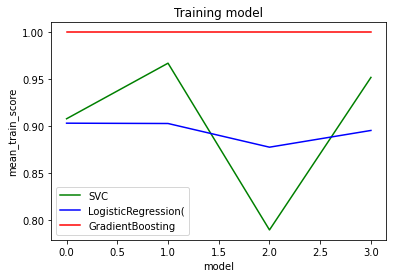

In [ ]:
plt.plot(range(4), ranking.iloc[:4, 3], "b", label="SVC", color='g')
plt.plot(range(4), ranking.iloc[4:8, 3], "b", label="LogisticRegression(", color='b')
plt.plot(range(4), ranking.iloc[8:, 3], "b", label="GradientBoosting", color='red')

plt.title("Training score")
plt.xlabel("model")
plt.ylabel("mean_train_score")
plt.legend()
plt.show()

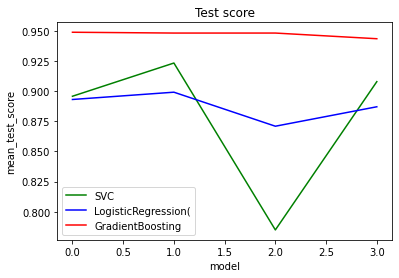

In [ ]:
plt.plot(range(4), ranking.iloc[:4, 4], "b", label="SVC", color='g')
plt.plot(range(4), ranking.iloc[4:8, 4], "b", label="LogisticRegression(", color='b')
plt.plot(range(4), ranking.iloc[8:, 4], "b", label="GradientBoosting", color='red')

plt.title("Test score")
plt.xlabel("model")
plt.ylabel("mean_test_score")
plt.legend()
plt.show()

In [ ]:
mean_squared_error(ranking.iloc[:,3], ranking.iloc[:,4])

0.001263853736101477

In [ ]:
mean_squared_error(ranking.iloc[:,3], ranking.iloc[:,4], squared=False)

0.03555072061297038

## Fim